# ESR Lab Code

# Finding a relationship between $\phi$ and ESR amplitude

1.000182312953077 107.28679955263522 -49.758706424636834 0.5687727141945268
0.0014529186447925612 0.29392373627185525 0.002706775164240698 0.21544241785667115


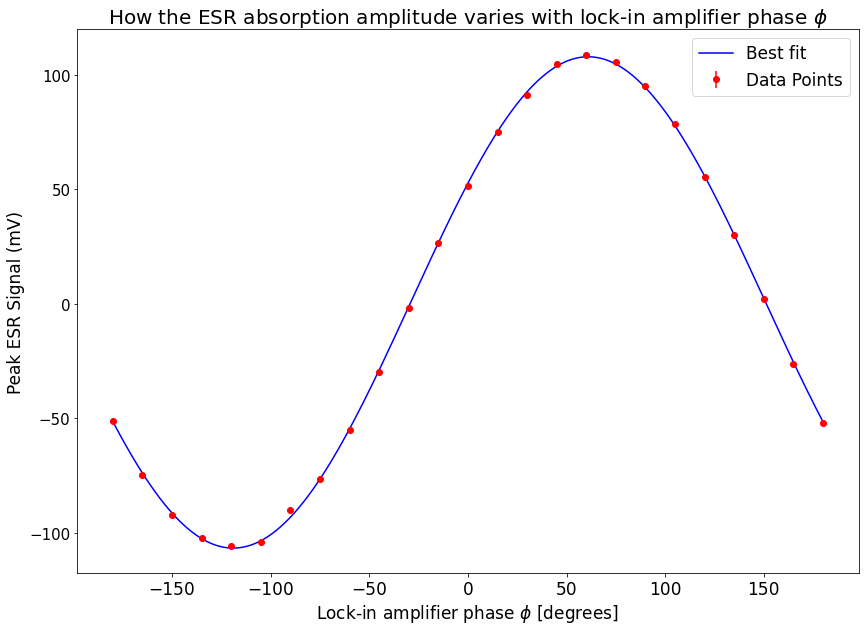

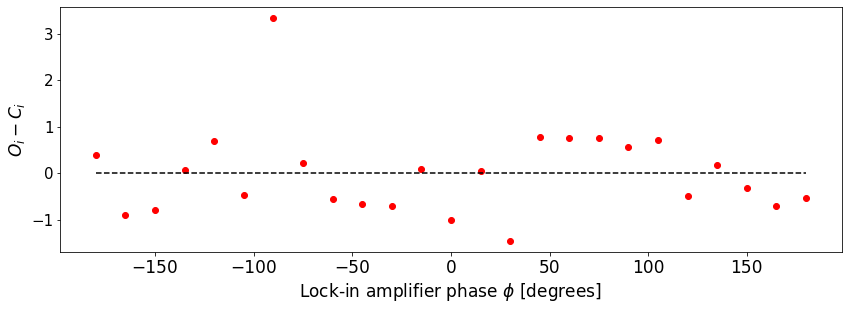

3.4642488884111673


In [1]:
''' Essential Imports '''
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


''' Defining sine curve '''
def my_sin(x, freq, amplitude, phase, offset):
    return np.sin(x*(np.pi/180) * freq + phase) * amplitude + offset


''' Data '''
phi = np.arange(-180,181,15)
angle = np.linspace(-180,180,1000)
amplitude = 1E+3 * np.array([-5.106E-2, -7.487E-2, -9.219E-2, -1.025E-1, -1.060E-1, -1.040E-1,
                             -8.991E-2, -7.635E-2, -5.521E-2, -2.962E-2,  -1.960E-3, 2.668E-2, 
                             5.163E-2, 7.520E-2, 9.112E-2, 1.045E-1, 1.086E-1, 1.054E-1, 9.492E-2, 
                             7.839E-2, 5.525E-2, 3.020E-2, 2.000E-3, -2.622E-2, -5.208E-2]) # in mV

yerrors = 0.5*np.ones(len(amplitude))
xerrors = 0.05*np.ones(len(phi))

''' Optimisation of sine curve '''
popt, pcov = curve_fit(my_sin, phi, amplitude, sigma=yerrors)
perr = np.sqrt(np.diag(pcov))


''' Plotting data with optimised curve '''
fig = plt.figure(figsize=(14,10))
plt.title('How the ESR absorption amplitude varies with lock-in amplifier phase $\phi$', size=20)
plt.ylabel('Peak ESR Signal (mV)', size=17)
plt.plot(angle, my_sin(angle, popt[0], popt[1], popt[2], popt[3]), label = 'Best fit', color = 'blue')
print(popt[0], popt[1], popt[2], popt[3])
print(perr[0], perr[1], perr[2], perr[3])
plt.errorbar(phi, amplitude, yerr=yerrors, fmt = 'o', color = 'red', label='Data Points')
plt.legend(loc = 'best', prop={'size':17})
plt.xlabel('Lock-in amplifier phase $\phi$ [degrees]', size=17)
plt.xticks(size=17)
plt.yticks(size=15)
#plt.savefig('Phase_graph.png')
plt.show()


''' Calculating and plotting residuals '''
best_fit = my_sin(phi, popt[0], popt[1], popt[2], popt[3])
residuals = amplitude - best_fit
fig = plt.figure(figsize=(14,4.5))
plt.scatter(phi,residuals, color='red',marker='o')
plt.plot(np.linspace(-180,180,180), np.zeros(180), 'k--')
plt.xlabel('Lock-in amplifier phase $\phi$ [degrees]', size=17)
plt.ylabel('$O_i - C_i$', size=17)
plt.xticks(size=17)
plt.yticks(size=15)
#plt.savefig('Phase_res.png')
plt.show()


''' Reduced Chi-Squared Values '''
chi_squared = np.sum((residuals**2)/(yerrors**2))
reduced_chi_squared = chi_squared * 1/len(residuals)
print(reduced_chi_squared)

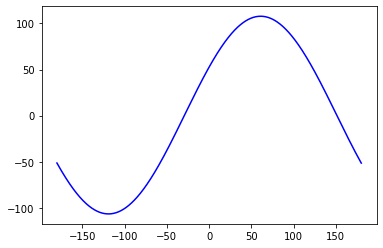

In [2]:
''' Defining sine curve '''
def my_sin(x, freq, amplitude, phase, offset):
    return np.sin(x*(np.pi/180) * freq + phase) * amplitude + offset

''' Optimisation of sine curve '''
popt, pcov = curve_fit(my_sin, phi, amplitude, sigma=yerrors)
perr = np.sqrt(np.diag(pcov))

''' Plotting the optimised sine curve'''
angle = np.linspace(-180,180,1000)
plt.plot(angle, my_sin(angle, popt[0], popt[1], popt[2], popt[3]), 
         label = 'Best fit', color = 'blue')

# Finding a relationship between modulating amplitude and ESR half-width

[15.74545455  0.71515152]
3.37751027947052


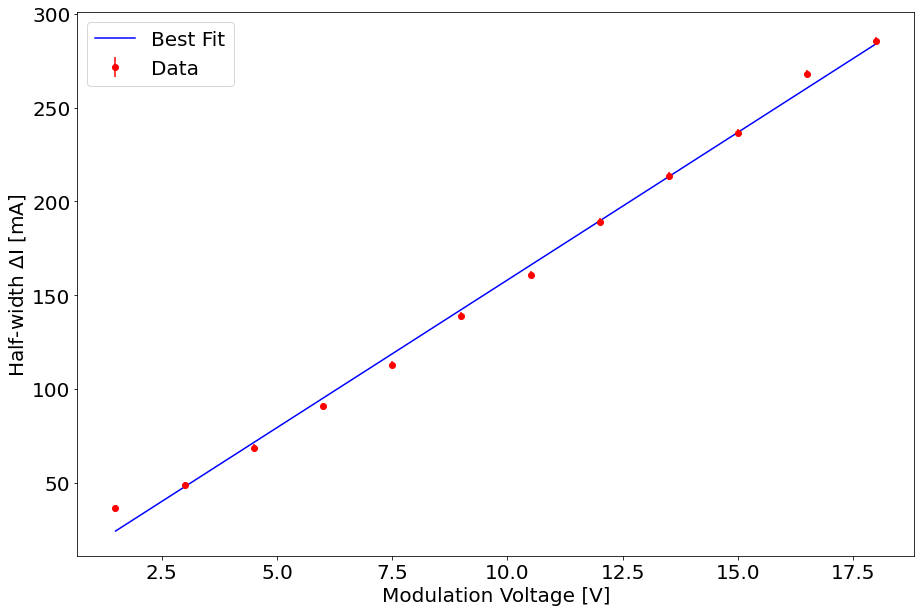

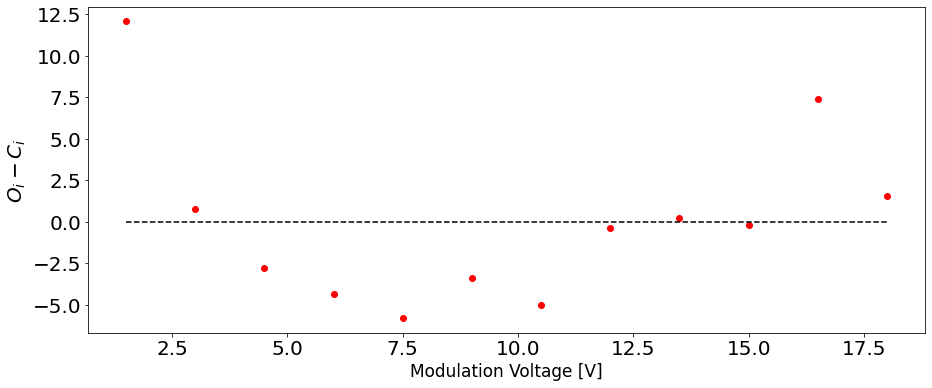

1.568538510101011


In [3]:
modulating_amplitude = np.arange(1.5,19,1.5)
half_width = [36.4, 48.7, 68.8, 90.8, 113.0, 139, 161, 189.3, 213.5, 236.7, 267.9, 285.7]
errors = 2*np.ones(len(modulating_amplitude))

def linear_fit(x, a, b):
    return a*x + b


popt, pcov = curve_fit(linear_fit, modulating_amplitude, half_width, sigma=errors)
perr = np.sqrt(np.diag(pcov))

print(popt)
print(perr[1])

fig = plt.figure(figsize=(15,10))
plt.plot(modulating_amplitude, linear_fit(modulating_amplitude, popt[0], popt[1]), color = 'blue', label='Best Fit')
plt.errorbar(modulating_amplitude, half_width, yerr=errors, fmt ='o', color = 'red', label = 'Data')
plt.ylabel('Half-width $\Delta$I [mA]', size=20)
plt.xlabel('Modulation Voltage [V]',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(loc = 'best', prop={'size':20})
#plt.savefig('volt_graph.png')

''' Residuals '''
best_fit = linear_fit(modulating_amplitude, popt[0], popt[1])
residuals = half_width - best_fit
fig = plt.figure(figsize=(15,6))
plt.scatter(modulating_amplitude,residuals, color='red', marker='o')
plt.plot(np.linspace(np.min(modulating_amplitude),np.max(modulating_amplitude),100), np.zeros(100), 'k--')
plt.xlabel('Modulation Voltage [V]', size=17)
plt.ylabel('$O_i - C_i$', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
#plt.savefig('volt_res.png')
plt.show()
''' Reduced Chi-Squared Values '''
reduced_chi_squared = (np.sum(1/len(residuals)*(residuals**2)/((errors**2)**2)))
print(reduced_chi_squared)

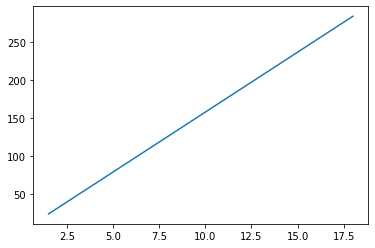

In [4]:
''' Defining linear fit '''
def linear_fit(x, a, b):
    return a*x + b

''' Optimisation of linear fit '''
popt, pcov = curve_fit(linear_fit, modulating_amplitude, half_width, sigma=errors)
perr = np.sqrt(np.diag(pcov))

''' Plotting the optimised linear fit'''
modulation_amplitude = np.arange(1.5,19,1.5)
plt.plot(modulating_amplitude, linear_fit(modulating_amplitude, popt[0], popt[1]))


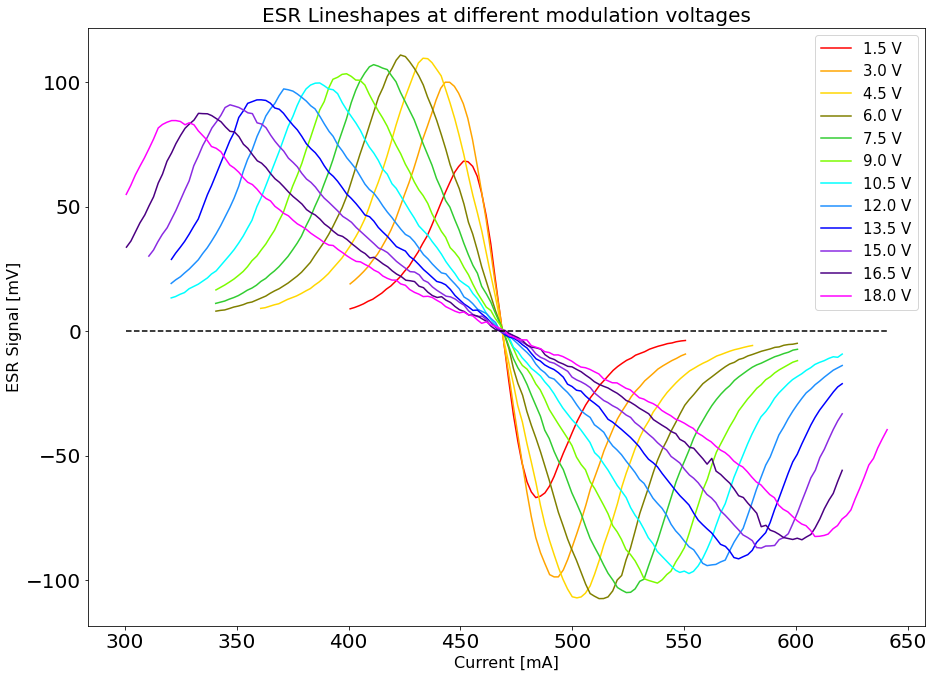

In [5]:
mod_amp1 = np.loadtxt('/Users/guneraygin/Desktop/University/Y3 Labs/ESR/Modulating Voltage Data/1.5.txt')
mod_amp2 = np.loadtxt('/Users/guneraygin/Desktop/University/Y3 Labs/ESR/Modulating Voltage Data/3.txt')
mod_amp3 = np.loadtxt('/Users/guneraygin/Desktop/University/Y3 Labs/ESR/Modulating Voltage Data/4.5.txt')
mod_amp4 = np.loadtxt('/Users/guneraygin/Desktop/University/Y3 Labs/ESR/Modulating Voltage Data/6.txt')
mod_amp5 = np.loadtxt('/Users/guneraygin/Desktop/University/Y3 Labs/ESR/Modulating Voltage Data/7.5.txt')
mod_amp6 = np.loadtxt('/Users/guneraygin/Desktop/University/Y3 Labs/ESR/Modulating Voltage Data/9.txt')
mod_amp7 = np.loadtxt('/Users/guneraygin/Desktop/University/Y3 Labs/ESR/Modulating Voltage Data/10.5.txt')
mod_amp8 = np.loadtxt('/Users/guneraygin/Desktop/University/Y3 Labs/ESR/Modulating Voltage Data/12.txt')
mod_amp9 = np.loadtxt('/Users/guneraygin/Desktop/University/Y3 Labs/ESR/Modulating Voltage Data/13.5.txt')
mod_amp10 = np.loadtxt('/Users/guneraygin/Desktop/University/Y3 Labs/ESR/Modulating Voltage Data/15.txt')
mod_amp11 = np.loadtxt('/Users/guneraygin/Desktop/University/Y3 Labs/ESR/Modulating Voltage Data/16.5.txt')
mod_amp12 = np.loadtxt('/Users/guneraygin/Desktop/University/Y3 Labs/ESR/Modulating Voltage Data/18.txt')

fig = plt.figure(figsize=(15,11))
plt.title('ESR Lineshapes at different modulation voltages',size=20)
plt.xlabel('Current [mA]',size=16)
plt.ylabel('ESR Signal [mV]',size=16)

plt.plot(mod_amp1[:,0], 1e+3*mod_amp1[:,1],color='red',label='1.5 V')
plt.plot(mod_amp2[:,0], 1e+3*mod_amp2[:,1],color='orange', label='3.0 V')
plt.plot(mod_amp3[:,0], 1e+3*mod_amp3[:,1],color='gold',label='4.5 V')
plt.plot(mod_amp4[:,0], 1e+3*mod_amp4[:,1],color='olive',label='6.0 V')
plt.plot(mod_amp5[:,0], 1e+3*mod_amp5[:,1],color='limegreen',label='7.5 V')
plt.plot(mod_amp6[:,0], 1e+3*mod_amp6[:,1],color='lawngreen',label='9.0 V')
plt.plot(mod_amp7[:,0], 1e+3*mod_amp7[:,1],color='aqua',label='10.5 V')
plt.plot(mod_amp8[:,0], 1e3*mod_amp8[:,1],color='dodgerblue',label='12.0 V')
plt.plot(mod_amp9[:,0], 1e3*mod_amp9[:,1],color='blue',label='13.5 V')
plt.plot(mod_amp10[:,0], 1e3*mod_amp10[:,1],color='blueviolet',label='15.0 V')
plt.plot(mod_amp11[:,0], 1e3*mod_amp11[:,1],color='indigo',label='16.5 V')
plt.plot(mod_amp12[:,0], 1e3*mod_amp12[:,1],color='magenta',label='18.0 V')

plt.plot(np.linspace(np.min(mod_amp11[:,0]),np.max(mod_amp12[:,0]),100), np.zeros(100), 'k--')

plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(loc='best', prop={'size':15})
#plt.savefig('Lineshapes mod volt.png')
plt.show()

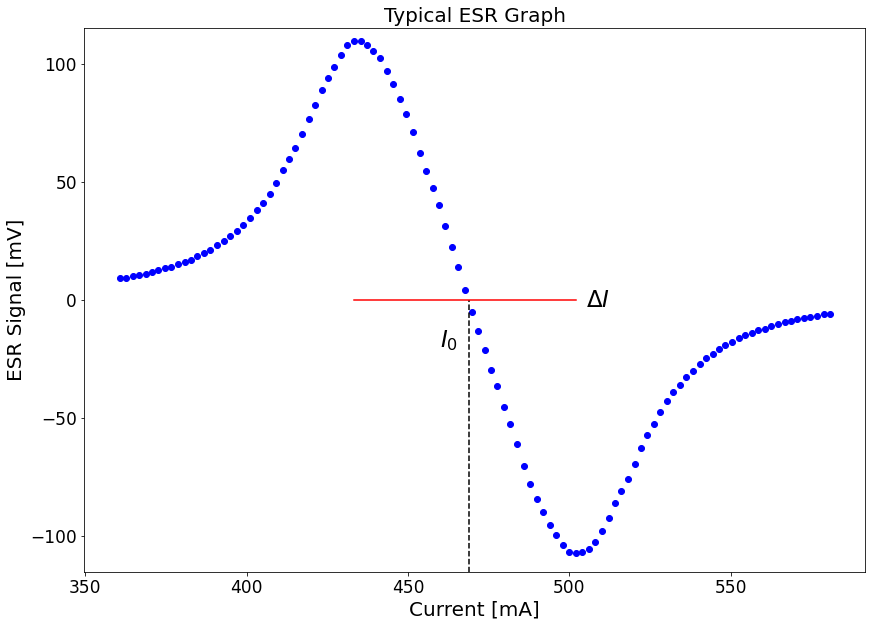

In [6]:
fig=plt.figure(figsize=(14,10))
plt.scatter(mod_amp3[:,0], 1e+3*mod_amp3[:,1],color='blue')
plt.xlabel('Current [mA]',size=20)
plt.ylabel('ESR Signal [mV]',size=20)
plt.xticks(size=17)
plt.yticks(size=17)
plt.plot(469*np.ones(50), np.linspace(-160,0,50), 'k--')
plt.plot(np.linspace(mod_amp3[:,0][np.argmax(mod_amp3[:,1])],mod_amp3[:,0][np.argmin(mod_amp3[:,1])],100), np.zeros(100) , 'r')
plt.ylim(-115,115)
plt.title('Typical ESR Graph',size=20)
plt.text(460, -20, '$I_0$', fontdict=None, size=23)
plt.text(505, -3, '$\Delta I$', fontdict=None, size=23)
#plt.savefig('simple ESR.png')
plt.show()

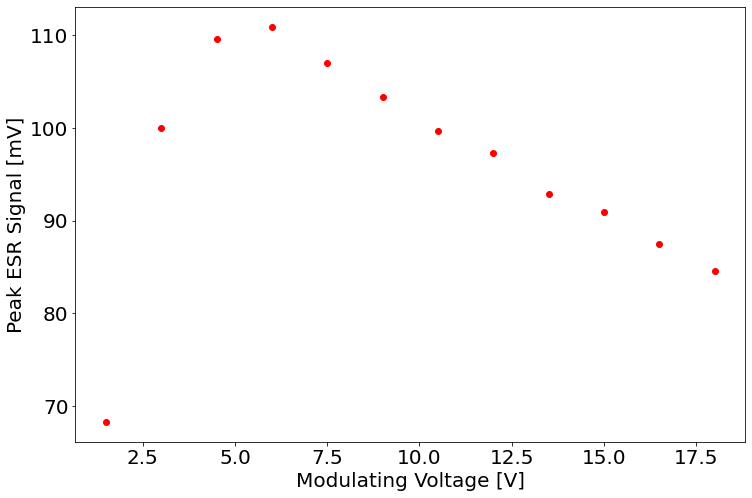

In [7]:
mod_amp_max1 = 1e3*np.max(mod_amp1[:,1])
mod_amp_max2 = 1e3*np.max(mod_amp2[:,1])
mod_amp_max3 = 1e3*np.max(mod_amp3[:,1])
mod_amp_max4 = 1e3*np.max(mod_amp4[:,1])
mod_amp_max5 = 1e3*np.max(mod_amp5[:,1])
mod_amp_max6 = 1e3*np.max(mod_amp6[:,1])
mod_amp_max7 = 1e3*np.max(mod_amp7[:,1])
mod_amp_max8 = 1e3*np.max(mod_amp8[:,1])
mod_amp_max9 = 1e3*np.max(mod_amp9[:,1])
mod_amp_max10 = 1e3*np.max(mod_amp10[:,1])
mod_amp_max11 = 1e3*np.max(mod_amp11[:,1])
mod_amp_max12 = 1e3*np.max(mod_amp12[:,1])

max_amps = np.array([mod_amp_max1,mod_amp_max2,mod_amp_max3,mod_amp_max4,mod_amp_max5,
                    mod_amp_max6,mod_amp_max7,mod_amp_max8,mod_amp_max9,mod_amp_max10,mod_amp_max11,mod_amp_max12])

fig=plt.figure(figsize=(12,8))
plt.ylabel('Peak ESR Signal [mV]',size=20)
plt.xlabel('Modulating Voltage [V]',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.scatter(modulating_amplitude, max_amps,marker='o', color='r')
#plt.savefig('Mod Volt Intensity graph.png')
plt.show()

# Finding a relationship between modulating frequency and ESR amplitude

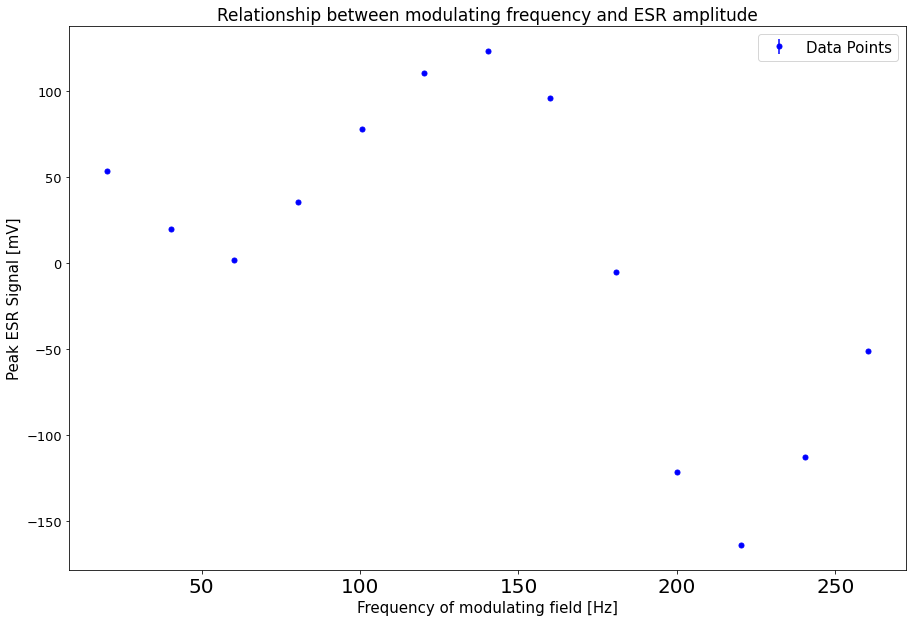

In [8]:
frequency = [20.05, 40.33, 60.14, 80.30, 100.6, 120.1, 140.3, 159.9, 180.8, 200.1, 220.4, 240.5, 260.3]
amplitude = 1E+3*np.array([5.325E-2, 1.950E-2, 1.86E-3, 3.537E-2, 7.797E-2,1.1025E-1, 1.2309E-1, 9.564E-2, -5.46E-3, -1.2135E-1, -1.6377E-1, -1.1265E-1, -5.115E-2])
errors = 0.005*np.ones(len(frequency)) # not real errors

range = np.linspace(20,260)

fig = plt.figure(figsize=(15,10))
plt.errorbar(frequency, amplitude, yerr=errors, fmt='.', ms=10, color='blue', label='Data Points')
plt.xlabel('Frequency of modulating field [Hz]', size=15)
plt.ylabel('Peak ESR Signal [mV]', size=15)
plt.title('Relationship between modulating frequency and ESR amplitude', size=17)

plt.legend(loc = 'best', prop={'size':15})
plt.xticks(size=20)
plt.yticks(size=13)
#plt.savefig('Mod Freq graph.png')
plt.show()

# How no modulation affects the ESR signal

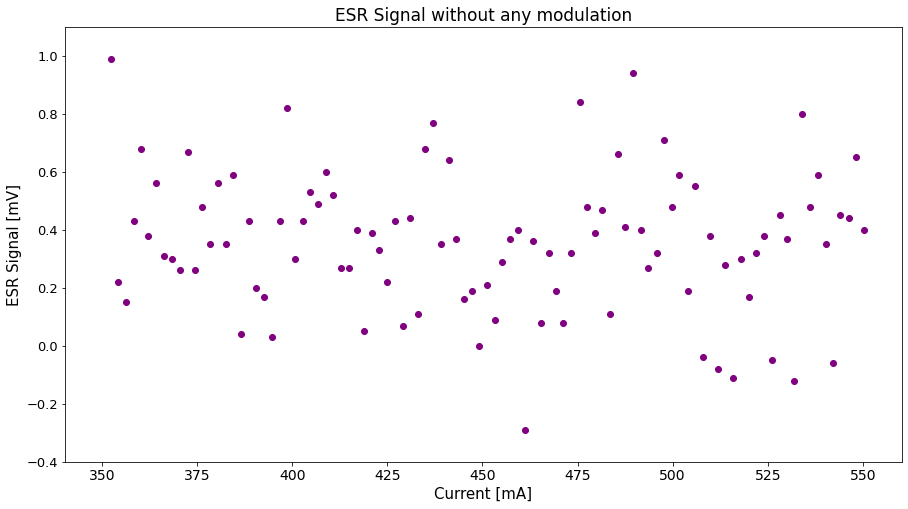

In [9]:
no_mod = np.loadtxt('/Users/guneraygin/Desktop/University/Y3 Labs/ESR/Other Data/no modulation.txt')

fig=plt.figure(figsize=(15,8))
plt.title('ESR Signal without any modulation',size=17)
plt.xlabel('Current [mA]', size=15)
plt.ylabel('ESR Signal [mV]', size=15)
plt.scatter(no_mod[:,0], 1e+3*no_mod[:,1], color='purple')
plt.ylim(-0.4,1.1)
plt.xticks(size=14)
plt.yticks(size=13)
#plt.savefig('no mod.png')
plt.show()

At both exessively high and low frequencies the signal tends to zero. 

# How ESR signal is distorted at low frequencies

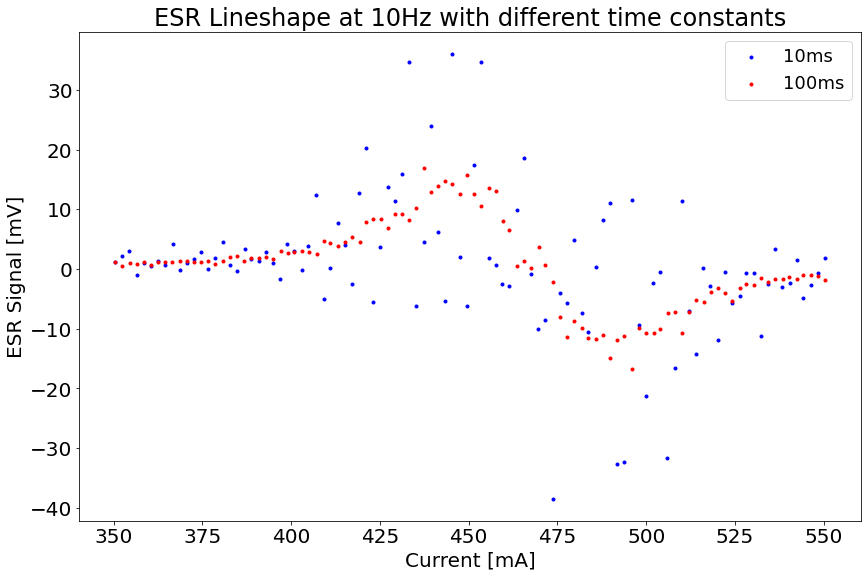

In [10]:
ten_ms = np.loadtxt('/Users/guneraygin/Desktop/University/Y3 Labs/ESR/Modulating Frequency Data/10Hz_10ms.txt')
hundred_ms = np.loadtxt('/Users/guneraygin/Desktop/University/Y3 Labs/ESR/Modulating Frequency Data/10Hz_100ms.txt')

fig = plt.figure(figsize=(14,9))
plt.title('ESR Lineshape at 10Hz with different time constants', size=24)
plt.xlabel('Current [mA]',size=20)
plt.ylabel('ESR Signal [mV]',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.scatter(ten_ms[:,0],1e+3*ten_ms[:,1], color='blue', label='10ms', marker='.')
plt.scatter(hundred_ms[:,0],1e+3*hundred_ms[:,1], color='red', label='100ms', marker='.')
plt.legend(loc='best', prop={'size':18})
#plt.savefig('diff tc.png')
plt.show()

# Finding g with optimal parameters

[    5.9310272  -2779.71028394]
[ 0.04779894 22.39861417]


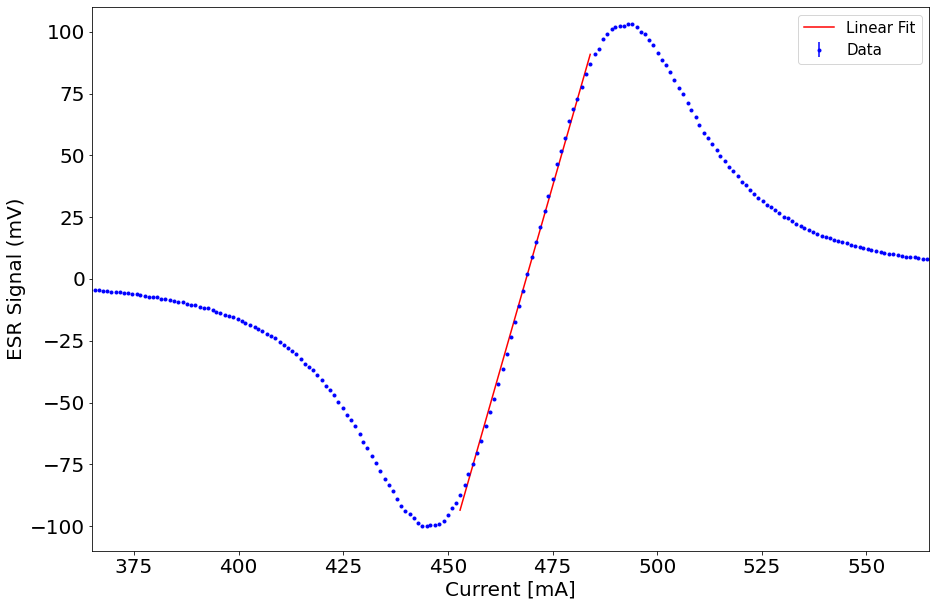

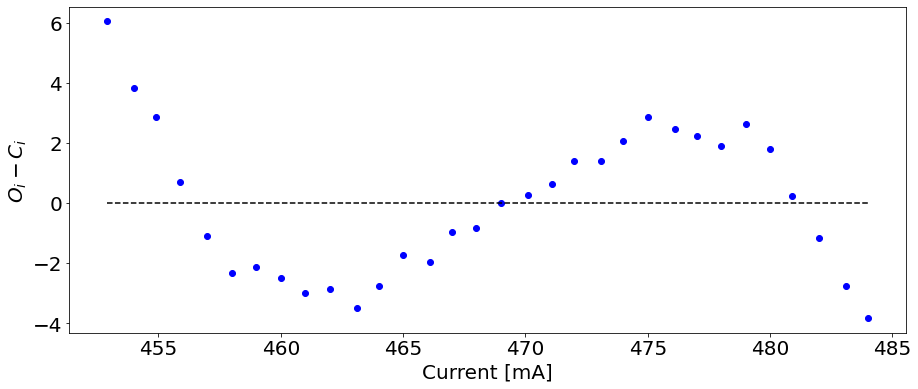

0.05742211182628716
The g value is: 2.080 $\pm 0.069, the current is: 468.67mA, magnetic field = 1.72mT
Comment: g value is less accurate due to position of dpph inside solenoid, but if it were in the optimumposition then the most precise value would be optained using this method.


In [11]:
import numpy as np
from scipy.constants import physical_constants as pc_dict
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def linear_fit(x, a, b):
    return a*x + b

f = np.loadtxt('/Users/guneraygin/Desktop/University/Y3 Labs/ESR/Other Data/bestest_data(1mA points).txt')


x = f[:,0]
y = 1e3*f[:,1]


ymax = np.max(y)
ymin = np.min(y)

y_index2 = np.argmax(y-ymax)
y_index1 = np.argmin(y-ymin)
'''
print(np.where(y==ymax))
print(np.where(y==ymin))
'''
sliced_x = (x[y_index1:y_index2])[8:-8] # getting rid of first 4 and last 3 values between max and min
sliced_y = (y[y_index1:y_index2])[8:-8] # as they don't show a linear relationship, so mess up best fit.

errors = 0.01*np.ones(len(x))
#m, b = np.polyfit(sliced_x[:-3], sliced_y[:-3], 1)
popt, pcov = curve_fit(linear_fit, sliced_x, sliced_y, sigma=0.01*np.ones(len(sliced_x)))
perr = np.sqrt(np.diag(pcov))
print(popt)
print(perr)

fig = plt.figure(figsize=(15,10))
plt.xlim(np.min(sliced_x), np.max(sliced_x))
plt.ylim(np.min(y), np.max(y))

plt.ylabel('ESR Signal (mV)', size=20)
plt.xlabel('Current [mA]',size=20)
plt.plot(sliced_x, linear_fit(sliced_x, popt[0], popt[1]), label='Linear Fit', color='red')
plt.errorbar(x, y, yerr=errors, fmt='.', color='blue', label='Data')
plt.legend(loc = 'best', prop={'size':15})
plt.xlim([365,565]) # to plot whole ESR graph
plt.ylim([-110,110])
plt.xticks(size=20)
plt.yticks(size=20)
#plt.savefig('g_plot.png')
plt.show()


best_fit_1 = linear_fit(sliced_x, popt[0], popt[1])
residuals = sliced_y - best_fit_1
fig = plt.figure(figsize=(15,6))
plt.scatter(sliced_x,residuals, color='blue',marker='o')
plt.plot(np.linspace(np.min(sliced_x),np.max(sliced_x),100), np.zeros(100), 'k--')
plt.xlabel('Current [mA]', size=20)
plt.ylabel('$O_i - C_i$', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.savefig('g_res.png')
plt.show()


''' Finding g '''
current = (-popt[1]/popt[0]) * 1E-3
h = pc_dict['Planck constant'][0]
nu = 50.1968E+6
mu_b = pc_dict['Bohr magneton'][0]
mu_0 = pc_dict['vacuum mag. permeability'][0]


B_max = mu_0 * (445/0.152) * (-(popt[1]+perr[1])/(popt[0]+perr[0])) 
B_min = mu_0 * (445/0.152) * (-(popt[1]-perr[1])/(popt[0]-perr[0])) 

B = mu_0 * (445/0.152) * current
g = h*nu/(mu_b * B)

nu_err = 0.015e+6
B_err = (B_min - B_max)*1e-3 + (mu_0 * 445/0.152 * 0.5e-3)
g_err = np.sqrt(g**2 * ((nu_err/nu)**2 + (B_err/B)**2))






print(B_err*1e3)

print(f'The g value is: {g:.3f} $\pm {g_err:.3f}, the current is: {current*1E+3:.2f}mA, magnetic field = {B*1E+3:.2f}mT')
print('Comment: g value is less accurate due to position of dpph inside solenoid, but if it were in the optimum'
      'position then the most precise value would be optained using this method.')

# Time Constant Experiment

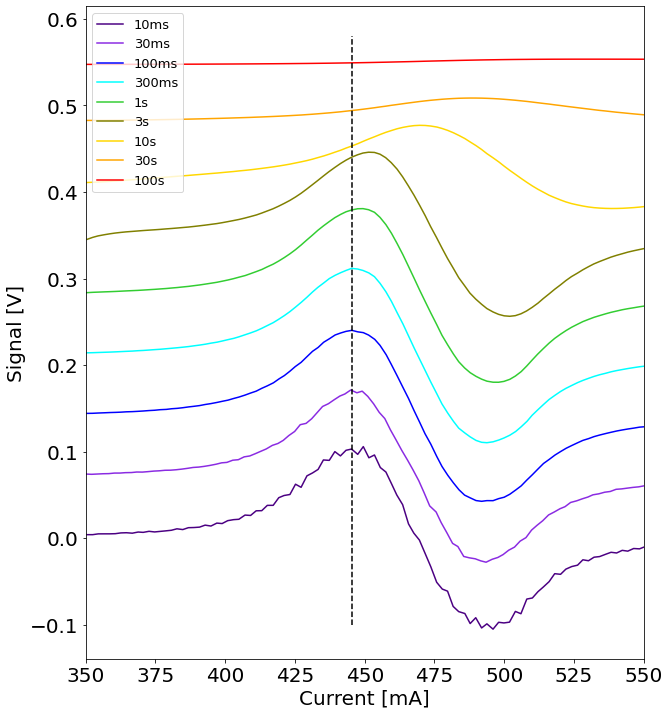

In [12]:
tc_10ms = np.loadtxt('/Users/guneraygin/Desktop/University/Y3 Labs/ESR/Time Constant Data/10ms.txt')
tc_30ms = np.loadtxt('/Users/guneraygin/Desktop/University/Y3 Labs/ESR/Time Constant Data/30ms time constant.txt')
tc_100ms = np.loadtxt('/Users/guneraygin/Desktop/University/Y3 Labs/ESR/Time Constant Data/100ms.txt')
tc_300ms = np.loadtxt('/Users/guneraygin/Desktop/University/Y3 Labs/ESR/Time Constant Data/300ms.txt')
tc_1s = np.loadtxt('/Users/guneraygin/Desktop/University/Y3 Labs/ESR/Time Constant Data/1s.txt')
tc_3s = np.loadtxt('/Users/guneraygin/Desktop/University/Y3 Labs/ESR/Time Constant Data/3s.txt')
tc_10s = np.loadtxt('/Users/guneraygin/Desktop/University/Y3 Labs/ESR/Time Constant Data/10s.txt')
tc_30s = np.loadtxt('/Users/guneraygin/Desktop/University/Y3 Labs/ESR/Time Constant Data/30s.txt')
tc_100s = np.loadtxt('/Users/guneraygin/Desktop/University/Y3 Labs/ESR/Time Constant Data/100s.txt')

fig=plt.figure(figsize=(10,12))


plt.xlabel('Current [mA]',size=20)
plt.ylabel('Signal [V]',size=20)

plt.plot(tc_10ms[:,0],tc_10ms[:,1], label='10ms', color='indigo')
plt.plot(tc_30ms[:,0],tc_30ms[:,1]+0.07, label='30ms', color='blueviolet')
plt.plot(tc_100ms[:,0],tc_100ms[:,1]+0.14, label='100ms', color='blue')
plt.plot(tc_300ms[:,0],tc_300ms[:,1]+0.21, label='300ms', color='aqua')
plt.plot(tc_1s[:,0],tc_1s[:,1]+0.28, label='1s', color='limegreen')
plt.plot(tc_3s[:,0],tc_3s[:,1]+0.35, label='3s', color='olive')
plt.plot(tc_10s[:,0],tc_10s[:,1]+0.42, label='10s', color='gold')
plt.plot(tc_30s[:,0],tc_30s[:,1]+0.49, label='30s', color='orange')
plt.plot(tc_100s[:,0],tc_100s[:,1]+0.56, label='100s', color='red')
plt.plot(tc_100ms[np.argmax(tc_100ms[:,1])][0]*np.ones(100), np.linspace(-0.1,0.58,100), 'k--')
plt.legend(loc = 'upper left', prop={'size':13})
plt.xlim(350,550)
plt.xticks(size=20)
plt.yticks(size=20)
#plt.savefig('time contant graph.png')
plt.show()

# How changing the Capacitance (RF Frequency) alters the ESR graph

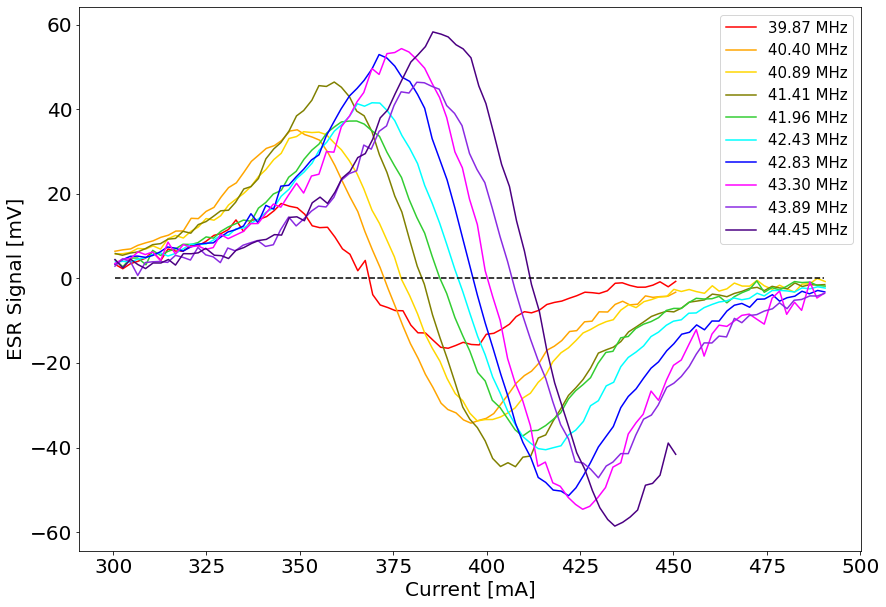

In [13]:
cap_dat1 = np.loadtxt('/Users/guneraygin/Desktop/University/Y3 Labs/ESR/Capacitor Data/39.87MHz.txt')
cap_dat2 = np.loadtxt('/Users/guneraygin/Desktop/University/Y3 Labs/ESR/Capacitor Data/40.40MHz.txt')
cap_dat3 = np.loadtxt('/Users/guneraygin/Desktop/University/Y3 Labs/ESR/Capacitor Data/40.89MHz.txt')
cap_dat4 = np.loadtxt('/Users/guneraygin/Desktop/University/Y3 Labs/ESR/Capacitor Data/41.41MHz.txt')
cap_dat5 = np.loadtxt('/Users/guneraygin/Desktop/University/Y3 Labs/ESR/Capacitor Data/41.96MHz.txt')
cap_dat6 = np.loadtxt('/Users/guneraygin/Desktop/University/Y3 Labs/ESR/Capacitor Data/42.43MHz.txt')
cap_dat7 = np.loadtxt('/Users/guneraygin/Desktop/University/Y3 Labs/ESR/Capacitor Data/42.83MHz.txt')
cap_dat8 = np.loadtxt('/Users/guneraygin/Desktop/University/Y3 Labs/ESR/Capacitor Data/43.30MHz.txt')
cap_dat9 = np.loadtxt('/Users/guneraygin/Desktop/University/Y3 Labs/ESR/Capacitor Data/43.89MHz.txt')
cap_dat10 = np.loadtxt('/Users/guneraygin/Desktop/University/Y3 Labs/ESR/Capacitor Data/44.45MHz.txt')

fig = plt.figure(figsize=(14,10))

plt.plot(cap_dat1[:,0], 1e+3*cap_dat1[:,1], color='red', label='39.87 MHz')
plt.plot(cap_dat2[:,0], 1e+3*cap_dat2[:,1], color='orange', label='40.40 MHz')
plt.plot(cap_dat3[:,0], 1e+3*cap_dat3[:,1], color='gold', label='40.89 MHz')
plt.plot(cap_dat4[:,0], 1e+3*cap_dat4[:,1], color='olive', label='41.41 MHz')
plt.plot(cap_dat5[:,0], 1e+3*cap_dat5[:,1], color='limegreen', label='41.96 MHz')
plt.plot(cap_dat6[:,0], 1e+3*cap_dat6[:,1], color='aqua', label='42.43 MHz')
plt.plot(cap_dat7[:,0], 1e+3*cap_dat7[:,1], color='blue', label='42.83 MHz')
plt.plot(cap_dat8[:,0], 1e+3*cap_dat8[:,1], color='magenta', label='43.30 MHz')
plt.plot(cap_dat9[:,0], 1e+3*cap_dat9[:,1], color='blueviolet', label='43.89 MHz')
plt.plot(cap_dat10[:,0], 1e+3*cap_dat10[:,1], color='indigo', label='44.45 MHz')

plt.plot(np.linspace(np.min(cap_dat1[:,0]),np.max(cap_dat9[:,0]),100), np.zeros(100), 'k--')
plt.legend(loc = 'best', prop={'size':15})
plt.xlabel('Current [mA]', size=20)
plt.ylabel('ESR Signal [mV]', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.savefig('RF graph.png')
plt.show()

Graph shows that as RF frequency increases, the current (B field) at which absorption occurs increases. It also shows that as RF freq increases, the ESR signal amplitude increases. 

## Finding relationship between max signal and RF frequency

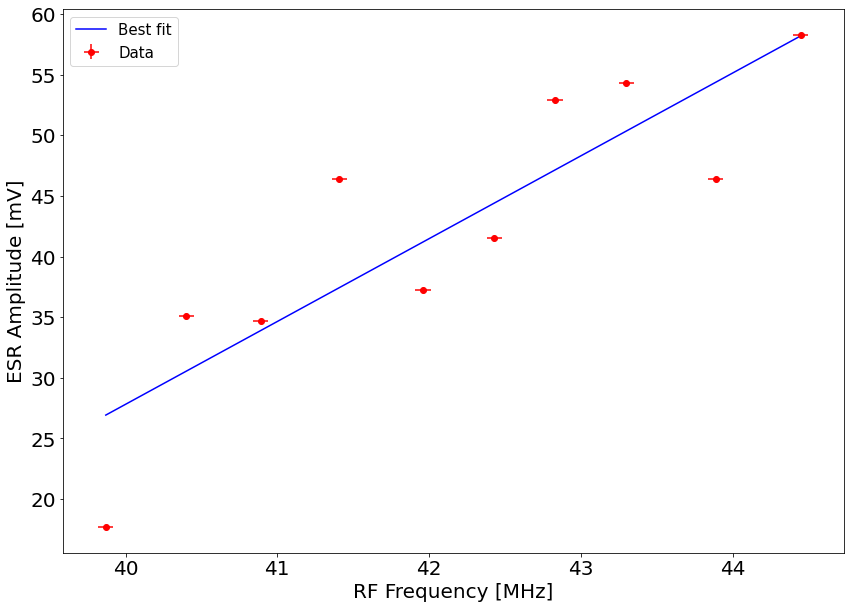

In [14]:
cap_dat1_max = 1e+3*np.max(cap_dat1[:,1])
cap_dat2_max = 1e+3*np.max(cap_dat2[:,1])
cap_dat3_max = 1e+3*np.max(cap_dat3[:,1])
cap_dat4_max = 1e+3*np.max(cap_dat4[:,1])
cap_dat5_max = 1e+3*np.max(cap_dat5[:,1])
cap_dat6_max = 1e+3*np.max(cap_dat6[:,1])
cap_dat7_max = 1e+3*np.max(cap_dat7[:,1])
cap_dat8_max = 1e+3*np.max(cap_dat8[:,1])
cap_dat9_max = 1e+3*np.max(cap_dat9[:,1])
cap_dat10_max = 1e+3*np.max(cap_dat10[:,1])

amplitude = np.array([cap_dat1_max, cap_dat2_max, cap_dat3_max, cap_dat4_max, cap_dat5_max, cap_dat6_max, 
                     cap_dat7_max, cap_dat8_max, cap_dat9_max, cap_dat10_max])
amplitude_errors = 0.1*np.ones(len(amplitude))
RF = np.array([39.87, 40.40, 40.89, 41.41, 41.96, 42.43, 42.83, 43.30, 43.89, 44.45])
RF_errors = 0.05*np.ones(len(RF))

popt, pcov = curve_fit(linear_fit, RF, amplitude, sigma=RF_errors)
perr = np.sqrt(np.diag(pcov))


fig = plt.figure(figsize=(14,10))
plt.xlabel('RF Frequency [MHz]',size=20)
plt.ylabel('ESR Amplitude [mV]',size=20)
plt.plot(RF, linear_fit(RF, popt[0], popt[1]),color='blue', label='Best fit')
plt.xticks(size=20)
plt.yticks(size=20)
plt.errorbar(RF,amplitude, yerr=amplitude_errors, xerr=RF_errors, color='red', fmt='o', label='Data')
plt.legend(loc='best', prop={'size':15})
plt.savefig('RF amplitude graph.png')

## Finding a relationship between RF and absorption current

y = 8.98x -12.51


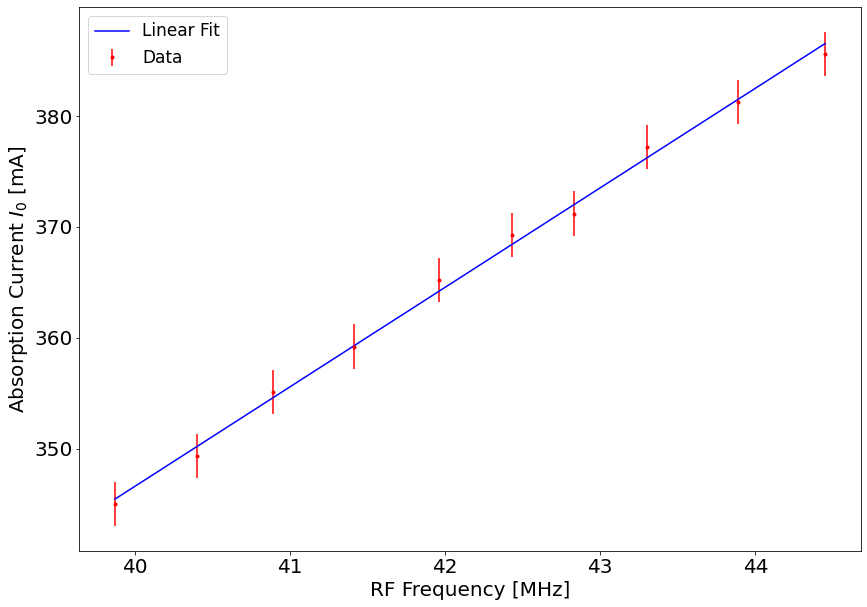

In [15]:
abs_cur1 = cap_dat1[np.argmax(cap_dat1[:,1]),0]
abs_cur2 = cap_dat2[np.argmax(cap_dat2[:,1]),0]
abs_cur3 = cap_dat3[np.argmax(cap_dat3[:,1])+2,0]
abs_cur4 = cap_dat4[np.argmax(cap_dat4[:,1]),0]
abs_cur5 = cap_dat5[np.argmax(cap_dat5[:,1]),0]
abs_cur6 = cap_dat6[np.argmax(cap_dat6[:,1]),0]
abs_cur7 = cap_dat7[np.argmax(cap_dat7[:,1]),0]
abs_cur8 = cap_dat8[np.argmax(cap_dat8[:,1]),0]
abs_cur9 = cap_dat9[np.argmax(cap_dat9[:,1]),0]
abs_cur10 = cap_dat10[np.argmax(cap_dat10[:,1]),0]

ESR_current = np.array([abs_cur1, abs_cur2, abs_cur3, abs_cur4, abs_cur5, abs_cur6, abs_cur7, abs_cur8,
                        abs_cur9, abs_cur10])
ESR_current_errors = 2*np.ones(len(ESR_current))

fig = plt.figure(figsize=(14,10))

plt.xlabel('RF Frequency [MHz]',size=20)
plt.ylabel('Absorption Current $I_0$ [mA]',size=20)
plt.errorbar(RF,ESR_current, yerr=ESR_current_errors, color='red', fmt='.', label='Data')

# Fitting a linear curve
popt, pcov = curve_fit(linear_fit, RF, ESR_current, sigma=ESR_current_errors)
perr = np.sqrt(np.diag(pcov))
plt.plot(RF, linear_fit(RF, popt[0], popt[1]), label='Linear Fit', color='blue')

plt.legend(loc='best', prop={'size':17})
plt.xticks(size=20)
plt.yticks(size=20)
#plt.savefig('RF current graph.png')
print(f'y = {popt[0]:.2f}x {popt[1]:.2f}')